# Data Preprocessing

#### Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

#### Data preprocessing in Machine Learning is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. In simple words, data preprocessing in Machine Learning is a data mining technique that transforms raw data into an understandable and readable format.

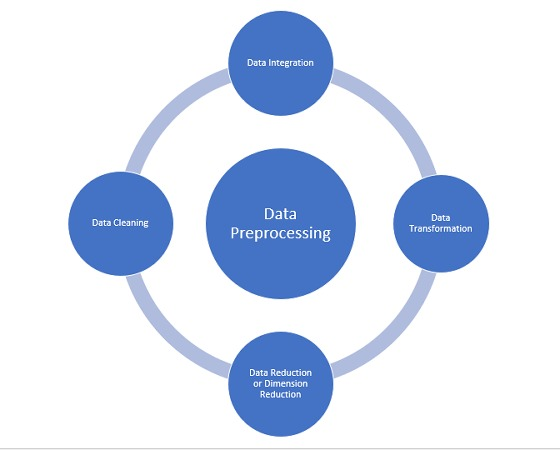

#### (1) Data Cleaning:-
         (a) Handling Missing Values
         (b) Handling Noisy Data
              (i) Binning:
              (ii)Regression:
              (iv) Clustering:

#### (2) Data Integration:-
          (i) Schema integration
          (ii) Entity identification problem
          (iii) Detecting and resolving data value concepts

#### (3) Data Reduction:-
         (i) Dimensionality reduction
         (ii) Numerosity Reduction
         (iii) Data compression

#### (4) Data Transformation:-
         (a) Smoothing
         (b) Aggregation
         (c) Discretization
         (d) Normalization

# Why Data Preprocessing in Machine Learning?

##### When it comes to creating a Machine Learning model, data preprocessing is the first step marking the initiation of the process. Typically, real-world data is incomplete, inconsistent, inaccurate (contains errors or outliers), and often lacks specific attribute values/trends. This is where data preprocessing enters the scenario – it helps to clean, format, and organize the raw data, thereby making it ready-to-go for Machine Learning models. Let’s explore various steps of data preprocessing in machine learning.

# Data Preprocessing Steps in M.L

## (1) Importing Libraries and the Dataset; 

In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('Data.csv')

In [9]:
print (dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [10]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## (2) The Independent Variable;

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [17]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## (3) Identifying and handling the Missing Values;

In [18]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

#### Solution 1 : Dropna:- 

In [19]:
df1 = dataset.copy()

In [26]:
# Summarize the shape of the raw data;
print("Before =>",dataset.shape)

# Drop rows with missing values;
df1.dropna(inplace=True)

# Summarize the shape of the data with missing rows removed;
print("After =>",df1.shape)

Before => (10, 4)
After => (8, 4)


#### Solution 2 : Fillna:- 

In [34]:
df2 = dataset.copy()

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Fill missing values with mean column values
#df2.fillna(df2.mean(), inplace=True)

# Count the number of NaN values in each column
print(df2.isnull().sum())

df2

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [42]:
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


#### Solution 3 : Scikit-Learn:- 

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [47]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## (5) Encoding the categorical data; 

#### Solution 1 : ColumnTransformer:-

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], 
                       remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [51]:
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [52]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### Soluton 2 : Pd.get_dummies():-

In [54]:
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [55]:
pd.get_dummies(df2)

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,True,False,False,True,False
1,27.0,48000.0,False,False,True,False,True
2,30.0,54000.0,False,True,False,True,False
3,38.0,61000.0,False,False,True,True,False
5,35.0,58000.0,True,False,False,False,True
7,48.0,79000.0,True,False,False,False,True
8,50.0,83000.0,False,True,False,True,False
9,37.0,67000.0,True,False,False,False,True


#### Solution 3 : LabelEncoder:-

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## (6) Splitting the dataset;

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1)

In [59]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [60]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [61]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [62]:
print(y_test)

[0 1]


## (7) Feature scaling;

##### MinMax Scaler:- 

In [63]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])

In [64]:
print(X_train[:, 3:])

[[0.5120772946859904 0.11428571428571432]
 [0.5652173913043479 0.45079365079365075]
 [0.7391304347826089 0.6857142857142855]
 [0.4782608695652175 0.37142857142857144]
 [0.0 0.0]
 [0.9130434782608696 0.8857142857142857]
 [1.0 1.0]
 [0.34782608695652173 0.2857142857142856]]


In [65]:
print(X_test[:, 3:])

[[0.1304347826086958 0.17142857142857149]
 [0.43478260869565233 0.5428571428571427]]


##### Standard Scaler:-

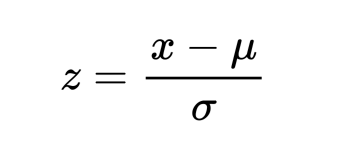

In [66]:
from sklearn.preprocessing import StandardScaler

sta = StandardScaler()
X_train[:, 3:] = sta.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sta.transform(X_test[:, 3:])

In [67]:
print(X_train[:, 3:])

[[-0.19159184384578537 -1.0781259408412425]
 [-0.014117293757057581 -0.07013167641635436]
 [0.5667085065333245 0.6335624327104541]
 [-0.3045301939022482 -0.3078661727429788]
 [-1.9018011447007983 -1.4204636155515822]
 [1.1475343068237058 1.2326533634535486]
 [1.4379472069688963 1.5749910381638883]
 [-0.740149544120035 -0.5646194287757338]]


In [68]:
print(X_test[:, 3:])

[[-1.4661817944830116 -0.9069571034860727]
 [-0.4497366439748436 0.20564033932252992]]


## Normalization Vs. Standardization:-

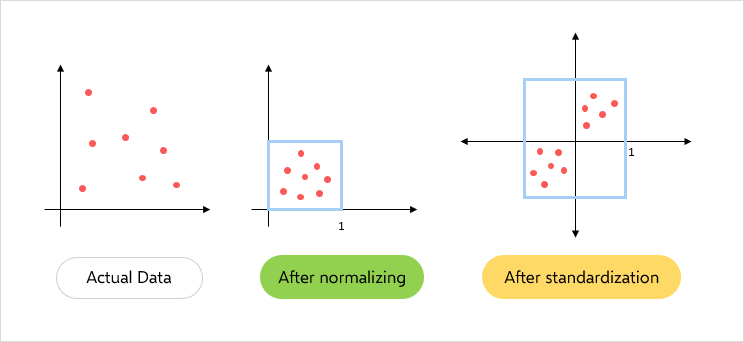